In [1]:
import requests
from bs4 import BeautifulSoup
from tqdm.notebook import tqdm
import re
import time
from scipy.stats import mode
import numpy as np


# Задание 1

Дано: [Сайт Библио-Глобуса](https://www.biblio-globus.ru)

Задание: средствами парсинга ответить на список вопросов ниже





1) Какова в среднем длина (в страницах) книги из категории классическая литература в ассортименте магазина?

In [2]:
# список из headers - меры предосторожности от ошибки 403
#мы будем маскировать наши get запросы под разные user-agent взятые из открытых источников в интернете.

user_agents = [
    "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:100.0) Gecko/20100101 Firefox/100.0",
    "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/100.0.0.0 Safari/537.36",
    "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_5) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/13.1.1 Safari/605.1.15",
    "Mozilla/5.0 (Linux; Android 10; SM-G975F) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/100.0.0.0 Mobile Safari/537.36",
    "Mozilla/5.0 (iPhone; CPU iPhone OS 14_2 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/14.0.1 Mobile/15E148 Safari/604.1"
]
def get_page(url:str,page_num:int):
    """
    Получает HTML-код веб-страницы по указанному URL-адресу с использованием случайного заголовка.

    Аргументы:
    url (str): URL-адрес веб-страницы, с которой нужно получить данные.
    page_num (int): Номер страницы (будет использоваться для выбора headers).

    Возвращает:
    str: HTML-код веб-страницы, если запрос выполнен успешно. В случае ошибки 403 (Доступ запрещен),
    функция выведет сообщение об ошибке и вернет None.
    """
    try:
        # Случайно выбираем один из заголовков
        headers = {'User-Agent': user_agents[page_num%len(user_agents)]}
        req = requests.get(url, headers=headers)
        req.raise_for_status()  # Проверка на ошибку HTTP
        return req.text
    except requests.exceptions.HTTPError as err:
        if err.response.status_code == 403:
            print(f"Ошибка 403: Доступ запрещен для URL {url}")
            return None


In [ ]:
## собираем url'ы веб страниц из href'ов
books_urls_list = []
page_num = 1
url = f'https://www.biblio-globus.ru/catalog/category?id=226&page={page_num}&sort=0&inStock=on'
while True:
    page_content = get_page(url,page_num)
    if page_content is None:
        break
    soup = BeautifulSoup(page_content, 'html')
    if not soup.find_all('div', class_='product'):
        break
    for product in soup.find_all('div', class_='product'):
        books_urls_list.append('https://www.biblio-globus.ru' + product.h3.a['href'])

    print(f'Урлы со страницы №{page_num} собраны')
    page_num += 1
    url = f'https://www.biblio-globus.ru/catalog/category?id=226&page={page_num}&sort=0&inStock=on'
    time.sleep(0.5)

Урлы со страницы №1 собраны
Урлы со страницы №2 собраны
Урлы со страницы №3 собраны
Урлы со страницы №4 собраны
Урлы со страницы №5 собраны
Урлы со страницы №6 собраны
Урлы со страницы №7 собраны
Урлы со страницы №8 собраны
Урлы со страницы №9 собраны
Урлы со страницы №10 собраны
Урлы со страницы №11 собраны
Урлы со страницы №12 собраны
Урлы со страницы №13 собраны
Урлы со страницы №14 собраны
Урлы со страницы №15 собраны
Урлы со страницы №16 собраны
Урлы со страницы №17 собраны
Урлы со страницы №18 собраны
Урлы со страницы №19 собраны
Урлы со страницы №20 собраны
Урлы со страницы №21 собраны
Урлы со страницы №22 собраны
Урлы со страницы №23 собраны
Урлы со страницы №24 собраны
Урлы со страницы №25 собраны
Урлы со страницы №26 собраны
Урлы со страницы №27 собраны
Урлы со страницы №28 собраны
Урлы со страницы №29 собраны
Урлы со страницы №30 собраны
Урлы со страницы №31 собраны
Урлы со страницы №32 собраны
Урлы со страницы №33 собраны
Урлы со страницы №34 собраны
Урлы со страницы №35 со

осторожно! след. ячейка выполняется +- 40 минут.

In [5]:
#извлекаем из каждого url информацию о кол-ве страниц и цене и складываем в каждый список
count_pages_list=[]  ### список для сбора кол-ва страниц
cl_books_price_list=[] ### список для сбора цены в магазине и на сайте по каждой книге

for url in tqdm(books_urls_list[:]): #### цикл проходит по каждому url из списка
  print(url)
  page_content = get_page(url,books_urls_list.index(url))
  soup = BeautifulSoup(page_content, 'html')

  table = soup.find_all('table',class_ = 'decor2')[0]
  rows = table.find_all('tr')

  price_box = soup.find_all('div',class_ = 'price_box')[0]
  price_in_store = price_box.find('span',class_='price_new').get_text()
  cl_books_price_list.append(price_in_store)

  for row in rows:
      cells = row.find_all('td')
      label = cells[0].get_text(strip=True)
      value = cells[1].get_text(strip=True)
      if label == 'Количество страниц:':
        count_pages_list.append(int(re.search(r'\d+', value).group(0)))
  time.sleep(0.5)
count_pages_list


https://www.biblio-globus.ru/product/10864741
https://www.biblio-globus.ru/product/10835727
https://www.biblio-globus.ru/product/10633838
https://www.biblio-globus.ru/product/10623698
https://www.biblio-globus.ru/product/10508702
https://www.biblio-globus.ru/product/10388795
https://www.biblio-globus.ru/product/10182039
https://www.biblio-globus.ru/product/10954876
https://www.biblio-globus.ru/product/10955074
https://www.biblio-globus.ru/product/10951131
https://www.biblio-globus.ru/product/10938595
https://www.biblio-globus.ru/product/10949647
https://www.biblio-globus.ru/product/10948865
https://www.biblio-globus.ru/product/10949079
https://www.biblio-globus.ru/product/10945742
https://www.biblio-globus.ru/product/10945876
https://www.biblio-globus.ru/product/10946670
https://www.biblio-globus.ru/product/10943203
https://www.biblio-globus.ru/product/10943220
https://www.biblio-globus.ru/product/10939833
https://www.biblio-globus.ru/product/10938654
https://www.biblio-globus.ru/produ

TypeError: ignored

  0%|          | 0/1148 [00:00<?, ?it/s]

https://www.biblio-globus.ru/product/10893153
https://www.biblio-globus.ru/product/10949548
https://www.biblio-globus.ru/product/10894146
https://www.biblio-globus.ru/product/10889085
https://www.biblio-globus.ru/product/10275510
https://www.biblio-globus.ru/product/10044586
https://www.biblio-globus.ru/product/10954665
https://www.biblio-globus.ru/product/10950251
https://www.biblio-globus.ru/product/10905455
https://www.biblio-globus.ru/product/10482562
https://www.biblio-globus.ru/product/10918952
https://www.biblio-globus.ru/product/10902606
https://www.biblio-globus.ru/product/10917779
https://www.biblio-globus.ru/product/10887280
https://www.biblio-globus.ru/product/10886876
https://www.biblio-globus.ru/product/10864741
https://www.biblio-globus.ru/product/10835727
https://www.biblio-globus.ru/product/10633838
https://www.biblio-globus.ru/product/10623698
https://www.biblio-globus.ru/product/10508702
https://www.biblio-globus.ru/product/10388795
https://www.biblio-globus.ru/produ

[320,
 304,
 256,
 624,
 701,
 828,
 736,
 704,
 320,
 480,
 352,
 768,
 608,
 320,
 832,
 352,
 384,
 199,
 160,
 640,
 380,
 349,
 256,
 448,
 320,
 416,
 288,
 288,
 416,
 320,
 288,
 838,
 384,
 320,
 384,
 384,
 336,
 592,
 448,
 384,
 416,
 224,
 368,
 192,
 184,
 744,
 416,
 256,
 256,
 480,
 288,
 416,
 384,
 384,
 384,
 704,
 384,
 288,
 384,
 320,
 288,
 160,
 352,
 48,
 256,
 864,
 800,
 352,
 512,
 224,
 448,
 368,
 448,
 640,
 480,
 384,
 416,
 288,
 352,
 384,
 288,
 352,
 576,
 448,
 512,
 608,
 448,
 416,
 248,
 288,
 222,
 448,
 384,
 928,
 352,
 288,
 416,
 176,
 320,
 352,
 320,
 480,
 352,
 320,
 64,
 320,
 1696,
 320,
 800,
 479,
 352,
 320,
 320,
 352,
 317,
 479,
 224,
 446,
 381,
 960,
 319,
 319,
 368,
 639,
 254,
 288,
 444,
 478,
 272,
 448,
 704,
 384,
 400,
 384,
 512,
 1424,
 576,
 384,
 768,
 320,
 800,
 384,
 640,
 320,
 256,
 352,
 224,
 480,
 360,
 544,
 216,
 222,
 256,
 288,
 320,
 80,
 864,
 384,
 448,
 448,
 160,
 256,
 384,
 608,
 320,
 288,
 256,

❗❗❗ **FYI**  
 Произошёл сбой интернета и из-за этого по аутпуту может показаться что ячейка завершилась с ошибкой, однако это не так, и ячейка доработала корректно и спарсила все url'ы.

In [6]:
print('Средняя длина страниц книги из категории классическая литература в ассортименте магазина',sum(count_pages_list)/len(count_pages_list))

Средняя длина страниц книги из категории классическая литература в ассортименте магазина 460.74106364428945


2) Какое у этих книг распределение цен? (попробуйте нарисовать [гистограмму](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html))


In [ ]:
cl_books_price_list = [int(re.search(r'\d+', x).group(0)) for x in cl_books_price_list]

In [11]:
print('Количество собранных книг',len(cl_books_price_list))

Количество собранных книг 1148


### посчитаем среднее, моду и медиану ценовой категории классической литературы

In [12]:
cl_books_price_array = np.array(cl_books_price_list)
mode_result = mode(cl_books_price_array)
print("Самая популярная цена: ", mode_result.mode)
mean_result = np.mean(cl_books_price_array)
print("Средняя цена на книгу:", mean_result)
median_result = np.median(cl_books_price_array)
print("Медианная цена на книгу:", median_result)

percentile_99 = np.percentile(cl_books_price_array, 99)
above_percentile_99 = cl_books_price_array[cl_books_price_array
                                           > percentile_99]

print("Значения выше 99-го перцентиля:", above_percentile_99)

Самая популярная цена:  239
Средняя цена на книгу: 617.76393728223
Медианная цена на книгу: 409.0
Значения выше 99-го перцентиля: [3159 3447 4207 3159 3159 3699 3559 3239 3159 4219 3379 5339]


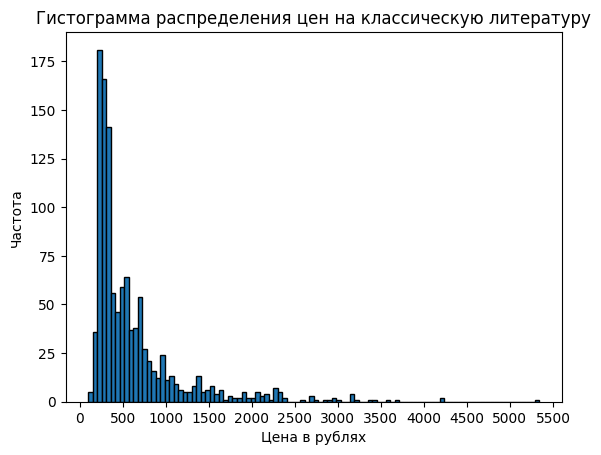

In [13]:
import matplotlib.pyplot as plt
plt.hist(cl_books_price_list, bins=100, edgecolor='black')
plt.xticks(list(range(0,6000,500)))

# Настройка заголовка и меток осей
plt.title('Гистограмма распределения цен на классическую литературу')
plt.xlabel('Цена в рублях')
plt.ylabel('Частота')


# Отображение гистограммы
plt.show()


Комментарий к графику:
Больше всего книг встречается в ценовом диапазоне до ``500`` рублей.
Имеется выбросы значений - ``3159, 3447, 4207,3159, 3159, 3699, 3559, 3239, 3159, 4219, 3379,5339``

### Решение задания 3

3) Как соотносятся средние цены книг по Python, Машинному обучению и C++? (поясните, как именно вы доставали такие книги :), то есть "я буду доставать книги вот так, потому что...")


 *Пояснение:* Зашли на сайт - вбили запрос "python" нажали поиск, после этого получили url  
 https://www.biblio-globus.ru/catalog/search?page=1&query=Python&cat=5&sort=0&inStock=on

In [14]:
def compute_average_price(dict_of_books,topic:str) -> None:
  """input dictionary of parsed books, return nothing"""
  summa_site = 0
  summa_store = 0
  for price in dict_of_books:

    summa_site = summa_site + dict_of_books[price][0]
    summa_store = summa_store + dict_of_books[price][1]

  average_books_on_site = summa_site/len(dict_of_books)
  average_books_on_store = summa_store/len(dict_of_books)

  print(f'Средняя цена на сайте на книги {topic} = {average_books_on_site:.2f}')
  print(f'Средняя цена в магазине на книги {topic} = {average_books_on_store:.2f}')

In [15]:
dict_of_dictionaries = {}
queries =['Python','C%2B%2B', 'Машинное обучение']
for q in range(len(queries)):
  dict_of_books = {}
  page_num = 1
  url = f'https://www.biblio-globus.ru/catalog/search?page={page_num}&query={queries[q]}&cat=5&sort=0&inStock=on'
  while True:
    page_content = get_page(url,page_num)
    if page_content is None:
          break
    soup = BeautifulSoup(page_content, 'html')
    if not soup.find_all('div', class_='product'):
          break
    products = soup.find_all('div',class_ ='product')
    for product in products:
      prices=[] ### будет записывать в себя цену на сайте и цену в магазине
      price_in_site = product.find_all('div',class_ = 'prices_item')[0].find_all('div',class_ = 'price_item_block')[0]
      price_in_store = product.find_all('div',class_ = 'prices_item')[0].find_all('div',class_ = 'price_item_block')[1]
      ### добавим проверку если есть скидка на сайте
      if price_in_site.find_all('span',class_ = "price_item_new price_item_with_discount") != []:
        prices.append(
            price_in_site.find_all('span',class_ = "price_item_new price_item_with_discount")[0].get_text())
      else:
        prices.append(price_in_site.get_text())
      prices.append(price_in_store.get_text())
      dict_key = product.h3.text + ' id: ' + product.h3.a['id'].split('_')[2]
      dict_of_books[dict_key] = [int(re.search(r'\d+', p.replace('—',"0")).group(0)) for p in prices]
    page_num +=1
    url=f'https://www.biblio-globus.ru/catalog/search?page={page_num}&query={queries[q]}&cat=5&sort=0&inStock=on'
    time.sleep(0.5)
  dict_of_dictionaries[q]=dict_of_books


In [16]:
compute_average_price(dict_of_dictionaries[0],'Python')
compute_average_price(dict_of_dictionaries[1],'C++')
compute_average_price(dict_of_dictionaries[2],'Машинное обучение')

Средняя цена на сайте на книги Python = 2191.31
Средняя цена в магазине на книги Python = 2407.26
Средняя цена на сайте на книги C++ = 3244.54
Средняя цена в магазине на книги C++ = 3668.23
Средняя цена на сайте на книги Машинное обучение = 2552.11
Средняя цена в магазине на книги Машинное обучение = 2888.64


В среднем цены на книги по C++ самые дорогие, а на Python самые дешевые

# Задание 2.  
Дано произвольное название, написанное в camelCase, перевести его в snake_case

In [17]:
import re
def camel_to_snake(name):
    """
    Преобразует строку из формата CamelCase в snake_case.
    Аргументы:
    name (str): Строка в формате CamelCase.
    Возвращает:
    str: Строка в формате snake_case.
    """
    # Используем регулярное выражение для поиска заглавных букв
    pattern = re.compile(r'([A-Z])')
    # Заменяем заглавные буквы на "_", после которого идет их маленькая версия
    snake_case_name = re.sub(pattern, r'_\1', name)
    # Приводим всю строку к нижнему регистру
    snake_case_name = snake_case_name.lower()
    # Если строка начинается с "_", удаляем его
    if snake_case_name.startswith('_'):
        snake_case_name = snake_case_name[1:]
    return snake_case_name

camel_case_name = "ThisIsIt"
snake_case_name = camel_to_snake(camel_case_name)
print(snake_case_name)

this_is_it


#Задание 3
Вовочка подготовил одно очень важное письмо, но везде указал неправильное время. Поэтому нужно заменить все вхождения времени на строку (TBD). Время — это строка вида HH:MM:SS или HH:MM, в которой HH — число от 00 до 23, а MM и SS — число от 00 до 59.

In [18]:
text = """Уважаемые! Если вы к 09:00 не вернёте
чемодан, то уже в 09:00:01 я за себя не отвечаю.
PS. С отношением 25:50 всё нормально!"""

# Проверяем каждый паттерн на валидность и заменяем его на "TBD"
def replace_time(matchobj):
    """
    Заменяет время в формате HH:MM:SS на "(TBD)", если оно корректно, иначе возвращает исходную строку.
    Аргументы:
    matchobj (re.Match): Объект совпадения, содержащий время в формате HH:MM:SS.
    Возвращает:
    str: Замененная строка "(TBD)" или исходная строка.
    """
    pattern = matchobj.group(0)
    time_parts = pattern.split(':')
    hours = int(time_parts[0])
    minutes = int(time_parts[1])
    seconds = 0 if len(time_parts)<=2 else int(time_parts[2])

    if (0 <= hours <= 23) and (0 <= minutes <= 59) and (0<=seconds <= 59):
        return "(TBD)"
    else:
        return pattern

# Заменяем валидные временные паттерны на "TBD"
modified_text = re.sub(r'\b\d{2}:\d{2}(?::\d{2})?\b', replace_time, text)

print("Измененный текст:")
print(modified_text)


Измененный текст:
Уважаемые! Если вы к (TBD) не вернёте
чемодан, то уже в (TBD) я за себя не отвечаю.
PS. С отношением 25:50 всё нормально!


# Задание 4  
Владимиру потребовалось срочно запутать финансовую документацию. Но так, чтобы это было обратимо. Он не придумал ничего лучше, чем заменить каждое целое число (непрерывную последовательность цифр) на его куб. Помогите ему.

Ввод:

Было закуплено 12 единиц техники
по 410.37 рублей.

Вывод:

Было закуплено 1728 единиц техники
по 68921000.50653 рублей.

In [19]:
input_text = "Было закуплено 12 единиц техники по 410.37 рублей."

pattern = r'\d+'

def cube(match_obj):
    """
    Возводит число в куб и возвращает его в виде строки.
    Аргументы:
    match_obj (re.Match): Объект совпадения, из которого извлекается число.
    Возвращает:
    str: Число, возведенное в куб, в виде строки.
    """
    number = int(match_obj.group(0))
    return str(number ** 3)

output_text = re.sub(pattern, cube, input_text)
print(output_text)

Было закуплено 1728 единиц техники по 68921000.50653 рублей.


# Задание 5

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg
from PIL import Image
import warnings
warnings.filterwarnings('ignore')

  0%|          | 0/8 [00:00<?, ?it/s]

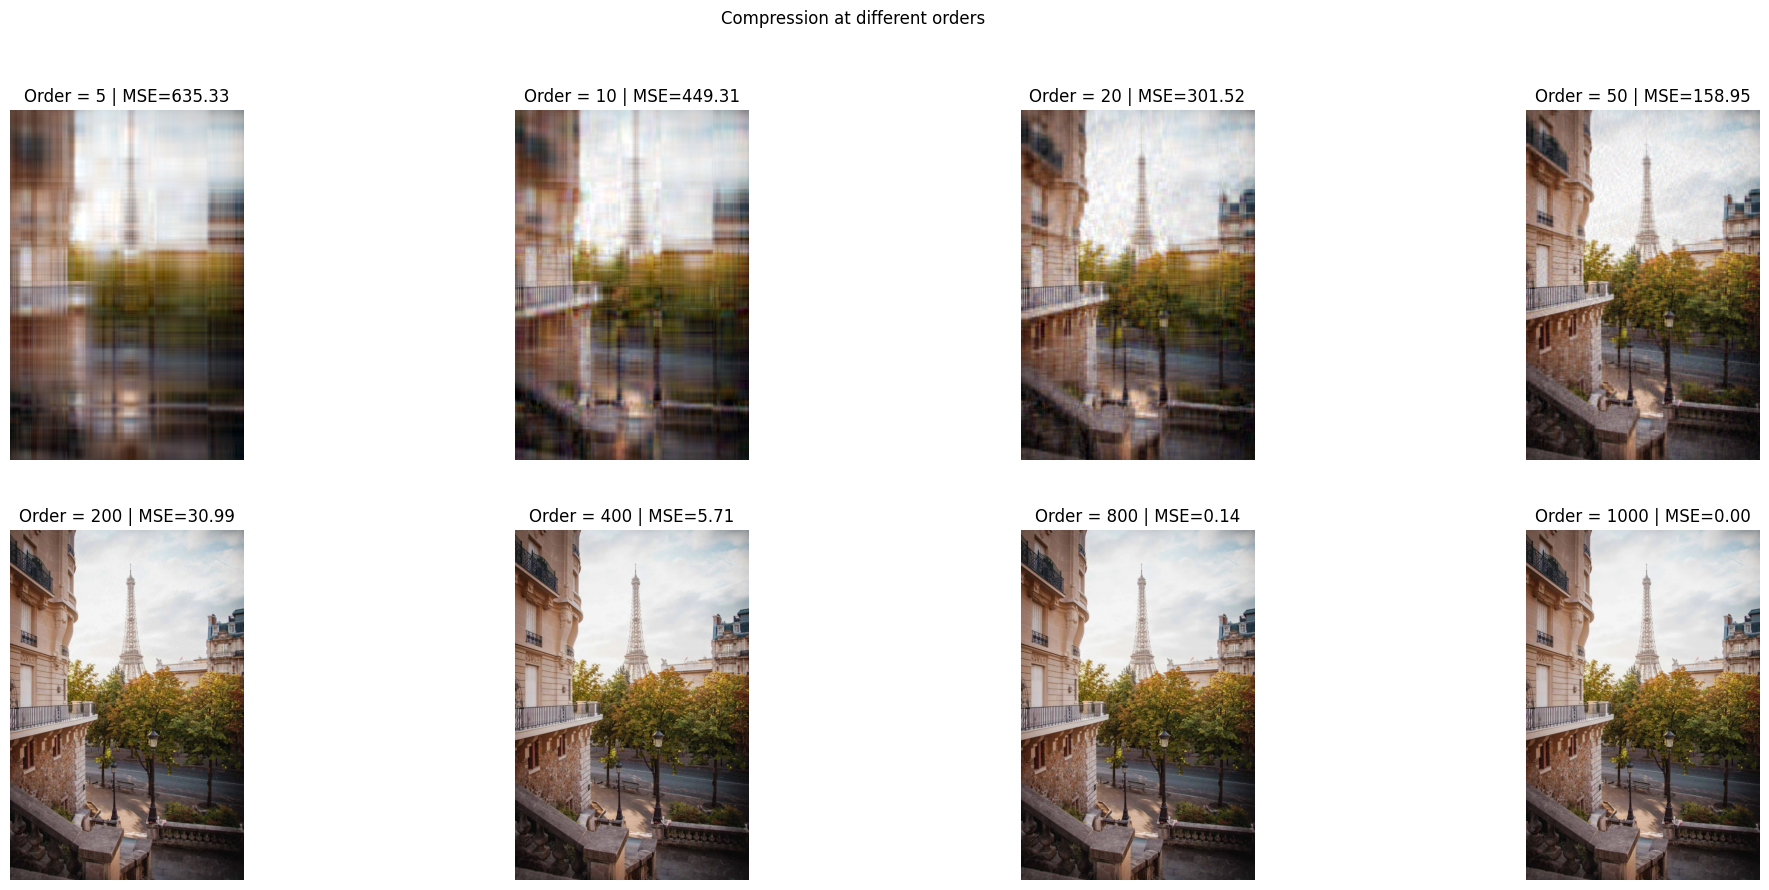

In [22]:
def svd_compressor(image, order):
    """Returns the compressed image channel at the specified order"""

    compressed = np.zeros(image.shape)
    U, S, V = np.linalg.svd(image)
    for i in range(order):
        Ui = U[:, i].reshape(-1, 1)
        Vi = V[i, :].reshape(1, -1)
        Si = S[i]
        compressed += (Ui * Si * Vi)
    S = np.diag(S)
    truncated_U,  truncated_S, truncated_V = U[:, :order],  S[:order, :order], V[:order, :]
    total_size = truncated_U.nbytes + truncated_S.nbytes + truncated_V.nbytes

    return compressed, total_size

def calculate_mse(original, compressed):
    """Calculate Mean Squared Error between original and compressed images"""
    return np.mean((original - compressed) ** 2)


image = Image.open("/content/Avenue-de-Camoens-Paris-Eiffel-Tower.png")

# Separation of the image channels
red_image = np.array(image)[:, :, 0]
green_image = np.array(image)[:, :, 1]
blue_image = np.array(image)[:, :, 2]
plt.figure(figsize=(25, 10))
orders = [ 5, 10, 20, 50,200, 400, 800, 1000]

for i in tqdm(range(len(orders))):

    # Use the compressor function
    order = orders[i]
    red_comp,r_channel_size = svd_compressor(red_image, order)
    green_comp, g_channel_size = svd_compressor(green_image, order)
    blue_comp, b_channel_size = svd_compressor(blue_image, order)

    # Combine images
    color_comp = np.zeros((np.array(image).shape[0], np.array(image).shape[1], 3))
    color_comp[:, :, 0] = red_comp
    color_comp[:, :, 1] = green_comp
    color_comp[:, :, 2] = blue_comp
    color_comp = np.around(color_comp).astype(int)

    mse = calculate_mse(np.array(image), color_comp)

    plt.subplot(2, 4, i + 1)
    plt.title("Order = {} | MSE={:.2f}".format(order,mse))
    plt.axis('off')
    plt.imshow(color_comp)

plt.suptitle('Compression at different orders')
plt.show()

Вывод: "на глаз" сжатие при 400 компонентов уже близко похоже на оригинал.  
Попробуем подобрать оптимальное количество компонент

In [23]:
def get_image_size(image):
    return image.size * image.itemsize

original_image_size = get_image_size(np.array(image))

orders = range(50,500,10)

for order in orders:
    red_comp, r_channel_size = svd_compressor(red_image, order)
    green_comp, g_channel_size = svd_compressor(green_image, order)
    blue_comp, b_channel_size = svd_compressor(blue_image, order)

    # Вычислить размер сжатого цветного изображения
    compressed_image_size = r_channel_size + g_channel_size + b_channel_size

    if compressed_image_size < original_image_size:
        print(f"Order = {order} | Размер сжатого изображения = {compressed_image_size} байт")
    else:
      break

Order = 50 | Размер сжатого изображения = 3132000 байт
Order = 60 | Размер сжатого изображения = 3772800 байт
Order = 70 | Размер сжатого изображения = 4418400 байт


Вывод: если оставить по 3 каналам по 70 компонент, то размер сжатого изображения не будет превышать исходный